In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("Covid Data.csv")

In [ ]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
data.shape

(1048575, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
for i in range(21):    
    u=data.iloc[:,i]
    print('column ',i,' : \n',u.value_counts())

column  0  : 
 2    662903
1    385672
Name: USMER, dtype: int64
column  1  : 
 12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64
column  2  : 
 1    525064
2    523511
Name: SEX, dtype: int64
column  3  : 
 1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64
column  4  : 
 9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64
column  5  : 
 97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64
column  6  : 
 2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64
column  7  : 
 30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116      

understanding data values for each column

In general 1 means YES & 2 means NO

97,98,99 are nulls and sometimes have meaning

In [ ]:
for i in range(21):    
    u=data.loc[(data.iloc[:,i]==97)|(data.iloc[:,i]==99)|(data.iloc[:,i]==98)]
    print(data.columns[i],' :',len(u))

USMER  : 0
MEDICAL_UNIT  : 0
SEX  : 0
PATIENT_TYPE  : 0
DATE_DIED  : 0
INTUBED  : 855869
PNEUMONIA  : 16003
AGE  : 345
PREGNANT  : 527265
DIABETES  : 3338
COPD  : 3003
ASTHMA  : 2979
INMSUPR  : 3404
HIPERTENSION  : 3104
OTHER_DISEASE  : 5045
CARDIOVASCULAR  : 3076
OBESITY  : 3032
RENAL_CHRONIC  : 3006
TOBACCO  : 3220
CLASIFFICATION_FINAL  : 0
ICU  : 856032


keep 1 & 2 values for some columns and drop others based on the number above 

eg.PREGNANT contains many unknown values,it will be treated next.

In [ ]:
lis=[6,9,10,11,12,13,14,15,16,17,18]
for i in (lis):    
    data=data.loc[(data.iloc[:,i]==1)|(data.iloc[:,i]==2)]


In [ ]:
data.SEX = data.SEX.replace(1,'FEMALE')
data.SEX = data.SEX.replace(2,'MALE')


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PREGNANCIES - SEX')

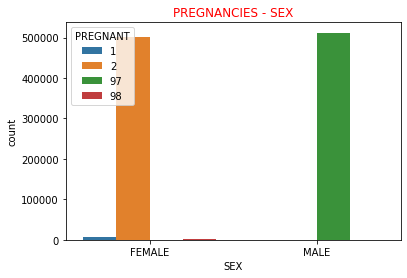

In [ ]:
#PREGNANT
plt.figure()
ax = sns.countplot(data.SEX,  hue = data.PREGNANT)
plt.title("PREGNANCIES - SEX",color="red")

Since 1& 2 values(blue->yes and orange->NO) 

Concluded that 97 (GREEN) is alaways for men 

just for ensurance compare number of all males and number of males with value 97

In [ ]:
u=data[(data["SEX"]=='MALE') & (data["PREGNANT"]==97)]
u.shape

(511936, 21)

In [ ]:
u2=data[(data["SEX"]=='MALE')]
u2.shape

(511936, 21)

In [ ]:
# Converting male pregnancy from 97 into 2
data.PREGNANT = data.PREGNANT.replace(97,2)
#keeping values 1&2 and Droping others
data = data[(data.PREGNANT == 1) | (data.PREGNANT == 2)]

Create 2 new columns

1-DEATH whether die or not

2-CLASIFFICATION whether classified with covid or not  


In [ ]:
data["DEATH"] = ['alive' if x=="9999-99-99" else 'Dead' for x in data.DATE_DIED]
data["CLASIFFICATION"] = ['Positive' if x<=3 else 'Negative' for x in data.CLASIFFICATION_FINAL]

converting (9999-99-99) into a specific known value to be able to deal with data using datetime



In [ ]:
data["DATE_DIED"]=data["DATE_DIED"].replace(to_replace='9999-99-99',value='01/01/1990')

In [ ]:
data["DATE_DIED"] = pd.to_datetime(data["DATE_DIED"])

data["Died_year"] = data["DATE_DIED"].dt.year
data["Died_month"] = data["DATE_DIED"].dt.month
data["Died_day"] = data["DATE_DIED"].dt.day

In [ ]:
data["Died_year"].value_counts()

1990    947320
2020     74345
2021       312
Name: Died_year, dtype: int64

Grouping people based on their age

In [ ]:
def AGE(x):
    'divide AGE into 5 categories'
    if x <= 2:
        return 'Babies'
    elif 3 <= x <= 16:
        return 'Children'
    elif 17 <= x <= 30:
        return 'Young-Adults'
    elif 31<= x <= 45:
        return 'Middle-Aged-Adults'
    else:
        return 'Old-Adults'

data['AGE_grouped'] = data.AGE.apply(lambda x: AGE(x))

Droping unnecceary columns

1.   'DATE_DIED'&'CLASIFFICATION_FINAL'
     
      already took the needed information
2.   'INTUBED'&'ICU'
      
      contain too much nulls


In [ ]:
data.drop(['DATE_DIED','CLASIFFICATION_FINAL','INTUBED','ICU'],axis=1,inplace=True)

In [ ]:
data.to_csv('preprocessed.csv')